**Identificação:** Paulo Henrique Liberato de Souza ( 1865291 )

#Evolução no comercio de jogos eletrônicos
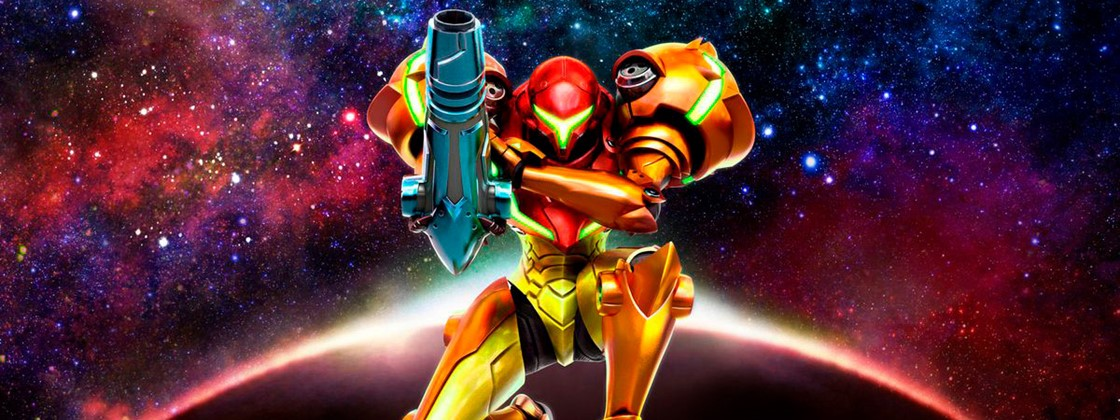



Do primitivo videogame de Higinbotham, o game evoluiu da simulação de jogos convencionais, tais como os de damas e xadrez, para disputas e confrontos expositivos. Em 1977, a empresa Atari lançou um console com cartuchos removíveis. Cada cartucho rodava um jogo diferente. Com esse sistema, os jogos eletrônicos ganharam popularidade, percebendo o grande interesse do público, muitas outras empresas começaram a desenvolver jogos eletrônicos. Elas melhoraram não só a qualidade do som e das imagens, mas também a tecnologia usada para rodar os games.

>**Objetivo do projeto**

Realização da classificação de jogos, analises de mercados e tendencias no segmento de jogos

>**Especificação Técnica**

Dataset: Para este projeto será utilizada uma base de dados vendas_games, extraído deste [LINK](https://www.dropbox.com/s/k8d9ih88mwdufpa/vendas_games.csv?dl=0) 

Formato: A base de dados esta em formato CSV e esta dividida certas colunas, são elas:
1.   **Rank:** Posição em que o game esta na classificação geral
2.   **Nome:** Nome do jogo
3.   **Plataforma**: Plataforma em que o jogo foi liberato
4.   **Ano**: Ano de lançamento
5.   **Genero**: Gênero do jogo
6.   **Produtora**: Empresa que produziu/publicou o jogo
7.   **Vendas_AN**: Vendas na América do norte
8.   **Vendas_JP**: Vendas no Japão
9.    **Vendas_Outras:** Vendas no restante do mundo
10.  **Vendas_Global** Total de vendas no mundo inteiro

Metodos de pré-processamento: 
*   Remoção de dados nulos
*   Retirada de espaços em branco e caracteres especiais
*   Remoção de dados duplicados
*   Será realizada algumas trasformações nos campos de data e valor
*   Será feita a discretização no campo de ranking

Algortimos que seram utilizados: K-NN, regressão linear e SVM 


# Iniciando o pré-processamento, tratando e transformando os dados
<img src="https://mcdn.wallpapersafari.com/medium/80/75/GVpz8W.jpg" width=900px height=400px align='center'>

In [104]:
#Realizando a declaração dos imports
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os as system
import locale
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import svm

In [105]:
#Configurações monetárias
locale.setlocale( locale.LC_MONETARY, 'en_US.utf8' )

'en_US.utf8'

In [106]:
#Informo qual o stylo que será plotado dos graficos
plt.style.use('grayscale')

In [107]:
#Irei realizar a baixa do arquivo em uma pasta para poder trabalhar com o arquivo

#Crio a pasta para conter o arquivo
!mkdir -p "/content/file"

#Verifico se o arquivo já existe na pasta, se sim, remove para não criar outras versões
if system.path.isfile('/content/file/vendas_games.csv'):
  system.unlink('/content/file/vendas_games.csv')

#irei baixar o arquivo CSV para dar prosseguimento
!wget -P '/content/file' https://www.dropbox.com/s/k8d9ih88mwdufpa/vendas_games.csv

--2021-07-11 21:25:04--  https://www.dropbox.com/s/k8d9ih88mwdufpa/vendas_games.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/k8d9ih88mwdufpa/vendas_games.csv [following]
--2021-07-11 21:25:04--  https://www.dropbox.com/s/raw/k8d9ih88mwdufpa/vendas_games.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc856813049c6bbbdd7bf7cf414d.dl.dropboxusercontent.com/cd/0/inline/BSEEgErJB3vOZs6Ml4bn_IsCNv0QkczuBDfPcdSr9qujBwFJjha8pRr8OAvhBhNbVgLhGsAPrwMug_5-O1uzApVaw48GTtv5He3Q0LGp54eK5czpY6Hrw2wy1ot3m8IslYOHVuPpORffehtgXZWdpKGP/file# [following]
--2021-07-11 21:25:04--  https://uc856813049c6bbbdd7bf7cf414d.dl.dropboxusercontent.com/cd/0/inline/BSEEgErJB3vOZs6Ml4bn_IsCNv0QkczuBDfPcdSr9qujBwFJjha8pRr8OAvhBhNbVgLhGsAPrwMug_

In [108]:
#Em seguida irei realizar a leitura inicial do arquivo e armazenar em uma váriavel
games = pd.read_csv( '/content/file/vendas_games.csv' )
games.columns = ['Ranking', 'Nome', 'Plataforma', 'Ano', 'Genero', 'Produtora', 'Vendas na America do Norte', 'Vendas nos EUA', 'Vendas no Japão', 'Outras vendas', 'Total']
games.head(5)

,Ranking,Nome,Plataforma,Ano,Genero,Produtora,Vendas na America do Norte,Vendas nos EUA,Vendas no Japão,Outras vendas,Total
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [109]:
#pego as informações que estão no dataframe
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ranking                     16598 non-null  int64  
 1   Nome                        16598 non-null  object 
 2   Plataforma                  16598 non-null  object 
 3   Ano                         16327 non-null  float64
 4   Genero                      16598 non-null  object 
 5   Produtora                   16540 non-null  object 
 6   Vendas na America do Norte  16598 non-null  float64
 7   Vendas nos EUA              16598 non-null  float64
 8   Vendas no Japão             16598 non-null  float64
 9   Outras vendas               16598 non-null  float64
 10  Total                       16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [110]:
#Verifico abaixo qual são as colunas que contem dados nulos para pegar o tipo
games.isnull().sum()

Ranking                         0
Nome                            0
Plataforma                      0
Ano                           271
Genero                          0
Produtora                      58
Vendas na America do Norte      0
Vendas nos EUA                  0
Vendas no Japão                 0
Outras vendas                   0
Total                           0
dtype: int64

In [111]:
#Como não possuo informações para substituição dos nulos, irei remover do dataframe
#Primeiramente realizo a retirada das linhas adicionais, que possuem tudo nulo
games.dropna(axis=0, inplace=True)

#Em seguida faço de fato a limpeza de dados nulos
games.dropna(axis=0, inplace=True)

#Verifico se a limpeza deu certo
games.isnull().sum()

Ranking                       0
Nome                          0
Plataforma                    0
Ano                           0
Genero                        0
Produtora                     0
Vendas na America do Norte    0
Vendas nos EUA                0
Vendas no Japão               0
Outras vendas                 0
Total                         0
dtype: int64

In [112]:
#Irei remover as duplicações
games.drop_duplicates()

,Ranking,Nome,Plataforma,Ano,Genero,Produtora,Vendas na America do Norte,Vendas nos EUA,Vendas no Japão,Outras vendas,Total
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [113]:
#Realizando a transformação dos valores

#Transformando o ano para a notação normal
games['Ano'] = games['Ano'].map( lambda x: str(x)[0:4])

#Transformando os valores monetários que estão na casa dos milhares
games['Vendas na America do Norte'] = games['Vendas na America do Norte'].map( lambda x: locale.currency(x * 1000000, grouping=True) )
games['Vendas no Japão'] = games['Vendas no Japão'].map( lambda x: locale.currency(x * 1000000, grouping=True) )
games['Vendas nos EUA'] = games['Vendas nos EUA'].map( lambda x: locale.currency(x * 1000000, grouping=True) )
games['Outras vendas'] = games['Outras vendas'].map( lambda x: locale.currency(x * 1000000, grouping=True) )

In [114]:
#Realizando a discretização
bins = [0,10,50,100,16600]
classificacao = pd.cut(games['Ranking'].to_numpy(), bins=bins, labels=[1, 2, 3, 4])

#Criando uma nova coluna para informar os TOPs
games['TOP_lista'] = classificacao

In [115]:
games

,Ranking,Nome,Plataforma,Ano,Genero,Produtora,Vendas na America do Norte,Vendas nos EUA,Vendas no Japão,Outras vendas,Total,TOP_lista
0,1,Wii Sports,Wii,2006,Sports,Nintendo,"$41,490,000.00","$29,020,000.00","$3,770,000.00","$8,460,000.00",82.74,1
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,"$29,080,000.00","$3,580,000.00","$6,810,000.00","$770,000.00",40.24,1
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,"$15,850,000.00","$12,880,000.00","$3,790,000.00","$3,310,000.00",35.82,1
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,"$15,750,000.00","$11,010,000.00","$3,280,000.00","$2,960,000.00",33.00,1
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,"$11,270,000.00","$8,890,000.00","$10,220,000.00","$1,000,000.00",31.37,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,"$10,000.00",$0.00,$0.00,$0.00,0.01,4
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,"$10,000.00",$0.00,$0.00,$0.00,0.01,4
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,$0.00,$0.00,$0.00,$0.00,0.01,4
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,$0.00,"$10,000.00",$0.00,$0.00,0.01,4


#Chegou a hora de brincar com os graficos

<img src='https://images.hdqwalls.com/wallpapers/space-invaders-retro-minimalism-4k-oy.jpg' width='900px' height='400px' align='center'>

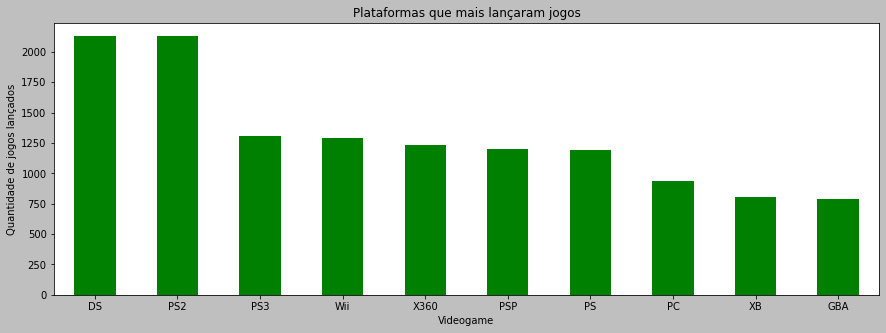

In [116]:
#visualizando quais as plataformas que mais lançaram jogos
games['Plataforma'].value_counts().head(10).plot(kind='bar', figsize=(14.8,5), grid=False, rot=0, color='green')

#Enfeitando tudo
plt.title('Plataformas que mais lançaram jogos')
plt.xlabel('Videogame')
plt.ylabel('Quantidade de jogos lançados')
plt.show()

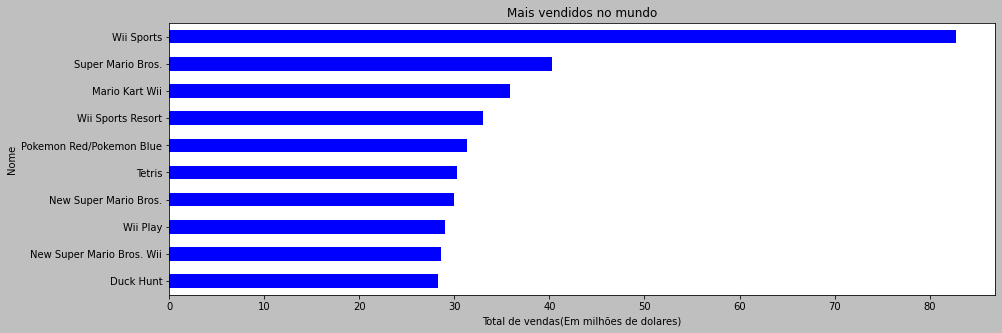

In [117]:
#Os 10 jogos mais vendidos no mundo
top10 = games[['Nome', 'Total']].head(10).set_index('Nome').sort_values('Total', ascending=True)
top10.plot(kind='barh', figsize=(14.8,5), grid=False, color='blue', legend=False )
plt.title('Mais vendidos no mundo')
plt.xlabel('Total de vendas(Em milhões de dolares)')
plt.show()

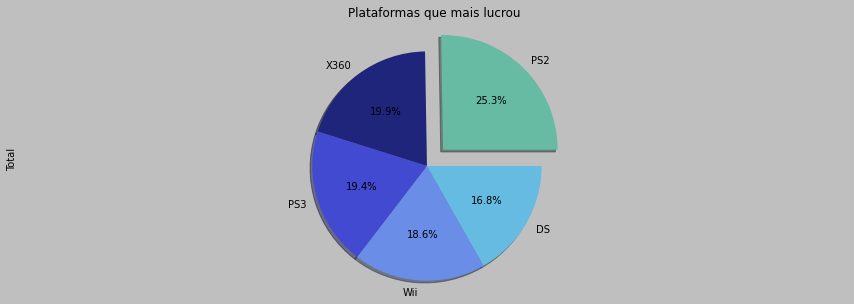

In [118]:
#Plataformas que mais faturaram
sums = games['Total'].groupby(games.Plataforma).sum().sort_values(ascending=False).head(5)
sums.plot(kind='pie', figsize=(14.8,5),colors=['#66bba2',"#20257C","#424ad1","#6a8ee8","#66bbe2"],explode=(0.2,0,0,0,0), shadow=True, autopct='%1.1f%%' )
plt.title("Plataformas que mais lucrou")
plt.axis("equal")
plt.show()

# Realizando uma analise de tendência
<img src='https://c4.wallpaperflare.com/wallpaper/854/333/266/mario-super-mario-bros-3-hd-wallpaper-preview.jpg' width='900px' height='400px'>

##Preparando os dados

In [119]:
#Inicialmente irei transformar a coluna genero em categoria, para que fique como numero
#esses dados serão minhas features
labelencoder_X=LabelEncoder()
cols = ['Genero', 'Total']
X = games.loc[:, cols].values
X[:,0] = labelencoder_X.fit_transform(X[:,0])

In [120]:
#Irei definir meu target
y = games.TOP_lista

##Particionando e normalizando os dados


In [121]:
#vamos realizar o particionamento direto com o scikit para treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Existem {} amostras de treino e {} amostras de teste'.format(X_train.shape[0], X_test.shape[0]))

Existem 11403 amostras de treino e 4888 amostras de teste


In [122]:
#Vamos normalizar os dados
sc = StandardScaler()
sc.fit(X_train)
X_train_normalizado = sc.transform(X_train)
X_test_normalizado = sc.transform(X_test)
X_normalizado = np.vstack((X_train_normalizado, X_test_normalizado))
y_normalizado = np.hstack((y_train, y_test))

##Plotagem

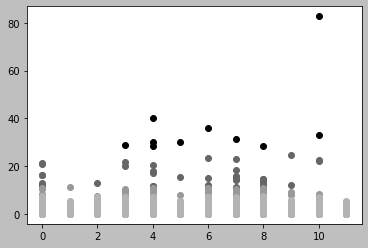

In [123]:
#Plotando os dados para visualização
for idx, cl in enumerate(np.unique(y)):
 plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], label=cl)

##K-nn

In [124]:
#Realizando o treino
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_normalizado, y_train)

#Verificando o desempenho
print('A acurácia do KNN na base de treino é: {:.2f} '.format(knn.score(X_train_normalizado, y_train)))
print('A acurácia do KNN na base de teste é: {:.2f} '.format(knn.score(X_test_normalizado, y_test)))

A acurácia do KNN na base de treino é: 1.00 
A acurácia do KNN na base de teste é: 1.00 


##Regressão linear

In [125]:
classificador_RL = LinearRegression()
classificador_RL.fit(X_train_normalizado, y_train)
print('A acurácia da Regressão Linear na base de treino é:{:.2f} '.format(classificador_RL.score(X_train_normalizado,y_train)))
print('A acurácia da Regressão Linear na base de teste é:{:.2f} '.format(classificador_RL.score(X_test_normalizado,y_test)))

A acurácia da Regressão Linear na base de treino é:0.64 
A acurácia da Regressão Linear na base de teste é:0.62 


##SVM

In [127]:

classificador_SVM = LogisticRegression(random_state=42)
classificador_SVM.fit(X_train_normalizado, y_train)
print('A acurácia do SVM na base de treino é: {:.2f} '.format(classificador_SVM.score(X_train_normalizado, y_train)))
print('A acurácia do SVM na base de teste é: {:.2f} '.format(classificador_SVM.score(X_test_normalizado, y_test)))

A acurácia do SVM na base de treino é: 1.00 
A acurácia do SVM na base de teste é: 1.00 
